In [8]:
import pandas as pd
from bertopic import BERTopic
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_json('one_word_illegal_sentences-gpt-4o-mini.jsonl', lines=True)

In [10]:
df.head()

,id,keyword,sentence,cluster,events,properties,settings,emotions
0,1,immigrants,“every local government has to figure out what...,1,[Discussion about local government responsibil...,"[Immigrants in this context are undocumented, ...",{'space': 'Unknown (likely a discussion or mee...,[Hopefulness: Suggested by the idea of upholdi...
1,2,immigrants,many undocumented immigrants were being booked...,1,[Undocumented immigrants are being booked into...,"[Immigrants lack official documentation, Immig...",{'space': 'Unknown (likely a detention facilit...,[Anxiety: Implied by the situation of being ar...
2,3,immigrants,nava offered three examples of undocumented im...,1,[Person provides examples of immigrant release...,"[Immigrants may face legal scrutiny, Undocumen...","{'space': 'Cook County', 'time': 'unknown'}",[Concern: Implied regarding public safety with...
3,4,immigrants,jerry brown is expected to sign the california...,0,"[Lawmakers pass the California Values Act, Jer...",[Immigrants refer to undocumented individuals ...,"{'space': 'California', 'time': 'Following the...",[Hope: For undocumented immigrants regarding n...
4,5,immigrants,the bill also gives protections to inmates who...,0,"[Bill provides protections for immigrants, Imm...",[Immigrants can benefit from educational or re...,{'space': 'Unknown (covers various institution...,[Hope: Implied by the possibility of sentence ...


In [11]:
df.groupby("cluster").count()

,id,keyword,sentence,events,properties,settings,emotions
cluster,,,,,,,
0,1905,1905,1905,1905,1905,1905,1905
1,565,565,565,565,565,565,565
2,680,680,680,680,680,680,680
3,230,230,230,230,230,230,230
4,742,742,742,742,742,742,742


In [12]:
#  what you want to do is take each of the subdomains and create a topic model for it

In [ ]:
#docs = [e for event  in df["emotions"] for e in event ] #
docs = [' '.join(e) for e in df["emotions"] ]
print(len(docs))

# Define your custom TF-IDF vectorizer with min_df and max_df
# vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.9)

# Initialize the BERTopic model with the custom vectorizer
#topic_model = BERTopic(vectorizer_model=vectorizer)
topic_model = BERTopic()


# Train the model
#topic_model = BERTopic(min_df=0.01, max_df=0.9)

topics, probs = topic_model.fit_transform(docs)

# View topics
print(topic_model.get_topic_info())  # Summary
print(topic_model.get_topic(0))  

4122
    Topic  Count                                        Name  \
0      -1   1049                             -1_the_of_by_in   
1       0    531      0_anxiety_fear_uncertainty_deportation   
2       1    381            1_tension_immigration_nature_the   
3       2    123        2_hopefulness_for_citizenship_reform   
4       3    119   3_controversy_immigration_the_surrounding   
..    ...    ...                                         ...   
59     58     13        58_voting_integrity_illegal_election   
60     59     12            59_job_market_citizens_americans   
61     60     11            60_access_healthcare_health_care   
62     61     10  61_services_group_restrictions_controversy   
63     62     10    62_misconceptions_repetitive_about_myths   

                                       Representation  \
0   [the, of, by, in, frustration, implied, and, s...   
1   [anxiety, fear, uncertainty, deportation, by, ...   
2   [tension, immigration, nature, the, by, and, l...  

In [15]:
probs.shape
probs

array([1.        , 1.        , 0.75228763, ..., 1.        , 0.        ,
       1.        ])

In [16]:
topic_model.get_document_info(docs)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Hopefulness: Suggested by the idea of upholdin...,2,2_hopefulness_for_citizenship_reform,"[hopefulness, for, citizenship, reform, advoca...",[Hopefulness: Suggested by the strong majority...,hopefulness - for - citizenship - reform - adv...,1.000000,False
1,Anxiety: Implied by the situation of being arr...,0,0_anxiety_fear_uncertainty_deportation,"[anxiety, fear, uncertainty, deportation, by, ...",[Anxiety: Likely felt by immigrants facing dep...,anxiety - fear - uncertainty - deportation - b...,1.000000,False
2,Concern: Implied regarding public safety with ...,11,11_concern_empathy_immigrants_on,"[concern, empathy, immigrants, on, the, advoca...",[Concern: Implied by the worries about the imp...,concern - empathy - immigrants - on - the - ad...,0.752288,False
3,Hope: For undocumented immigrants regarding ne...,9,9_sanctuary_cities_policies_tension,"[sanctuary, cities, policies, tension, between...",[Tension: Implied by the conflict between the ...,sanctuary - cities - policies - tension - betw...,0.516909,False
4,Hope: Implied by the possibility of sentence r...,-1,-1_the_of_by_in,"[the, of, by, in, frustration, implied, and, s...",[Concern: Implied in the discussion about undo...,the - of - by - in - frustration - implied - a...,0.000000,False
...,...,...,...,...,...,...,...,...
4117,Frustration: Implied from the halt of policy c...,-1,-1_the_of_by_in,"[the, of, by, in, frustration, implied, and, s...",[Concern: Implied in the discussion about undo...,the - of - by - in - frustration - implied - a...,0.000000,False
4118,Frustration: Implied in questioning the lack o...,-1,-1_the_of_by_in,"[the, of, by, in, frustration, implied, and, s...",[Concern: Implied in the discussion about undo...,the - of - by - in - frustration - implied - a...,0.000000,False
4119,Anxiety: Likely felt by the immigrant populati...,0,0_anxiety_fear_uncertainty_deportation,"[anxiety, fear, uncertainty, deportation, by, ...",[Anxiety: Likely felt by immigrants facing dep...,anxiety - fear - uncertainty - deportation - b...,1.000000,False
4120,Concern: About safety and the presence of crim...,-1,-1_the_of_by_in,"[the, of, by, in, frustration, implied, and, s...",[Concern: Implied in the discussion about undo...,the - of - by - in - frustration - implied - a...,0.000000,False


In [17]:
topic_distr, _ = topic_model.approximate_distribution(docs)
topic_distr.shape

(4122, 63)

In [18]:
# now turn it into a dataframe with the topic labels as column names
topic_names = topic_model.generate_topic_labels(nr_words=3, separator="_")
print(len(topic_names))



64


In [19]:
# remove outlier topic which is first
topic_names = topic_names[1:]
print(len(topic_names))
topic_names


63


['0_anxiety_fear_uncertainty',
 '1_tension_immigration_nature',
 '2_hopefulness_for_citizenship',
 '3_controversy_immigration_the',
 '4_advocacy_for_support',
 '5_concern_tension_immigration',
 '6_anger_evident_grief',
 '7_awareness_concern_complexity',
 '8_hope_advocacy_for',
 '9_sanctuary_cities_policies',
 '10_media_crime_assertion',
 '11_concern_empathy_immigrants',
 '12_alarm_arrests_illegal',
 '13_determination_solidarity_evident',
 '14_benefits_financial_federal',
 '15_aliens_controversy_illegal',
 '16_urgency_call_action',
 '17_illegal_aliens_frustration',
 '18_injustice_treatment_unfair',
 '19_relief_protection_opportunity',
 '20_frustration_undocumented_restrictions',
 '21_resilience_despite_vulnerability',
 '22_hope_citizenship_pathway',
 '23_health_healthcare_access',
 '24_deportation_controversy_policies',
 '25_daca_hope_protections',
 '26_hostility_language_division',
 '27_contempt_disapproval_disdain',
 '28_discontent_priorities_cynicism',
 '29_deportation_deportations_f

In [24]:
topic_vectors = pd.DataFrame(topic_distr, columns=topic_names)
topic_vectors.shape

(4122, 63)

In [25]:
topic_vectors['cluster'] = df['cluster']

In [26]:
summary = topic_vectors.groupby('cluster').mean()
summary

,0_anxiety_fear_uncertainty,1_tension_immigration_nature,2_hopefulness_for_citizenship,3_controversy_immigration_the,4_advocacy_for_support,5_concern_tension_immigration,6_anger_evident_grief,7_awareness_concern_complexity,8_hope_advocacy_for,9_sanctuary_cities_policies,...,53_injustice_empathy_blame,54_skepticism_questioning_critique,55_bill_bills_controversy,56_visa_victims_applying,57_drivers_empowerment_licenses,58_voting_integrity_illegal,59_job_market_citizens,60_access_healthcare_health,61_services_group_restrictions,62_misconceptions_repetitive_about
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.043554,0.045639,0.023070,0.033821,0.024201,0.034009,0.014200,0.022231,0.026332,0.012231,...,0.012120,0.007996,0.010677,0.007689,0.006610,0.006033,0.004240,0.007832,0.011398,0.008958
1,0.041693,0.044722,0.029869,0.033107,0.028117,0.033392,0.008443,0.025722,0.032557,0.010624,...,0.007682,0.006350,0.010520,0.009290,0.010591,0.004178,0.003429,0.008495,0.010058,0.007105
2,0.042244,0.046651,0.023164,0.033831,0.022972,0.036238,0.010356,0.024071,0.025753,0.011663,...,0.006495,0.007248,0.011348,0.012865,0.007114,0.006418,0.004528,0.007580,0.010695,0.006566
3,0.045244,0.047344,0.025125,0.031114,0.026336,0.037006,0.012345,0.023454,0.029611,0.016014,...,0.005162,0.006275,0.009965,0.009649,0.006035,0.003675,0.002401,0.007718,0.008613,0.005166
4,0.036050,0.049990,0.019291,0.039467,0.019536,0.042587,0.015368,0.023945,0.018252,0.013097,...,0.006624,0.009006,0.014210,0.006021,0.004332,0.011971,0.006046,0.004129,0.014162,0.007122


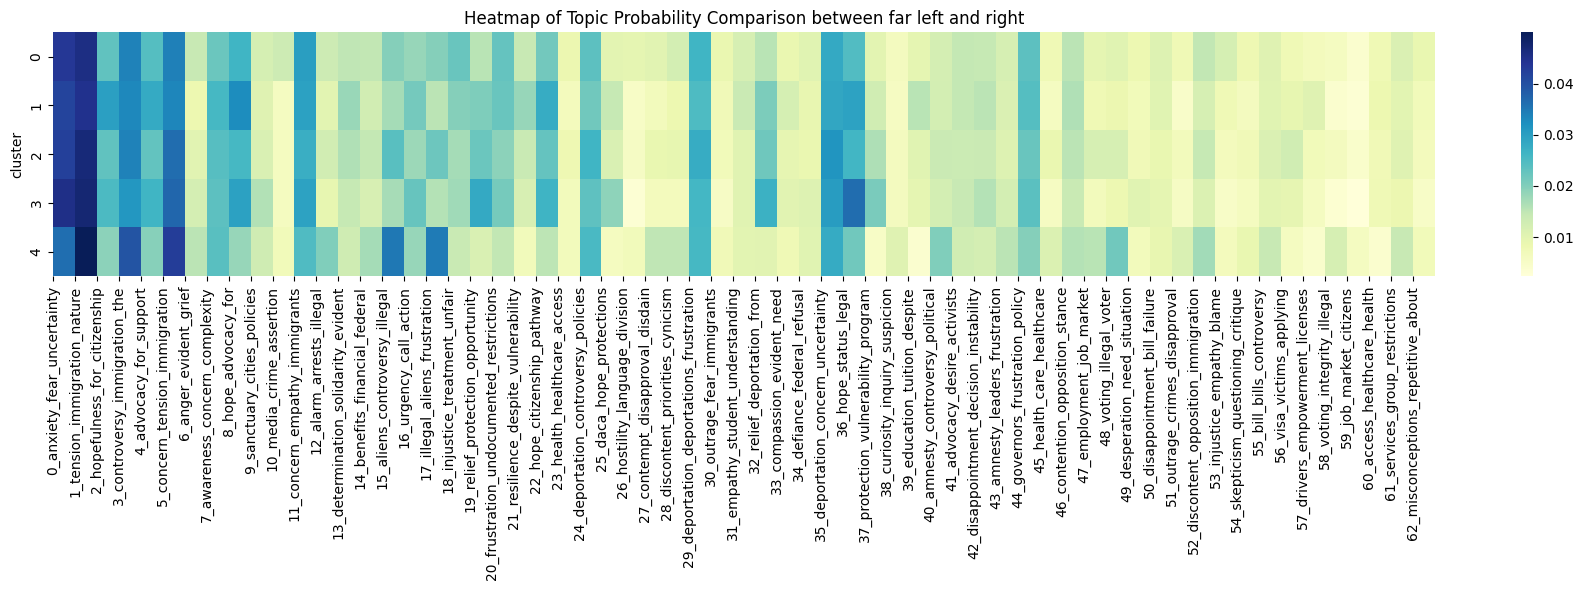

In [27]:
# Plot the heatmap
plt.figure(figsize=(18, 6))  # Wider plot
sns.heatmap(summary, cmap='YlGnBu', cbar=True)
# Ensure all x-ticks are shown
plt.xticks(ticks=range(len(summary.columns)), labels=summary.columns)

plt.title('Heatmap of Topic Probability Comparison between far left and right')
plt.tight_layout()
plt.show()